# Prediction Diabetes Dataset Using Feature Engineering and Data Preprocessing

# Business Problem

📌 It is desired to develop a machine learning model that can predict whether people have diabetes when their characteristics are specified. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

# Dataset Story

📌 About this dataset:This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage

* Pregnancies: To express the Number of pregnancies

* Glucose: To express the Glucose level in blood

* BloodPressure: To express the Blood pressure measurement

* SkinThickness: To express the thickness of the skin

* Insulin: To express the Insulin level in blood

* BMI: To express the Body mass index

* DiabetesPedigreeFunction: To express the Diabetes percentage

* Age: To express the age

* **Outcome**: To express the final result 1 is Yes and 0 is No

# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
!pip install missingno
import missingno as msno

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: '%.3f' % x)

# Import Dataset

if you want download dataset you can use [this link](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


# General Information About to Dataset

In [ ]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

######################### Head #########################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137             40             35      168 43.100                     2.288   33        1
######################### Tail #########################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.900                     0.171   63        0
76

# Anaylsis of Categorical and Numerical Variables

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"Num_but_cat: {len(num_but_cat)}")

Observations: 768
Variables: 9
Cat_cols: 1
Num_cols: 8
Cat_but_car: 0
Num_but_cat: 1


In [ ]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [ ]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

   Outcome  Ration
0      500  65.104
1      268  34.896
##########################################


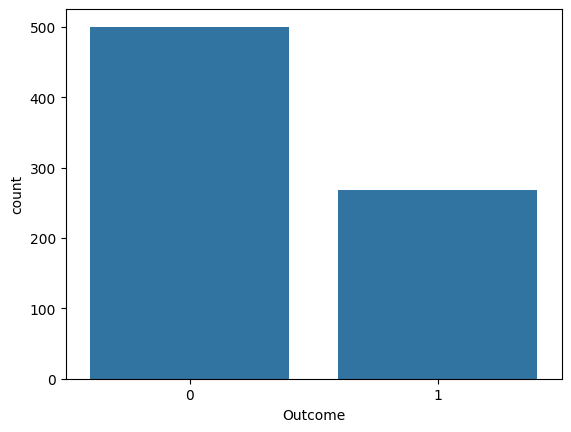

In [ ]:
cat_summary_df(df)

In [ ]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [ ]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   768.000
mean      3.845
std       3.370
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


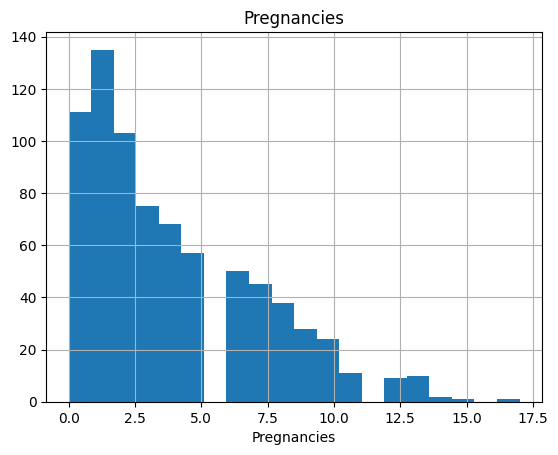

count   768.000
mean    120.895
std      31.973
min       0.000
1%       57.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


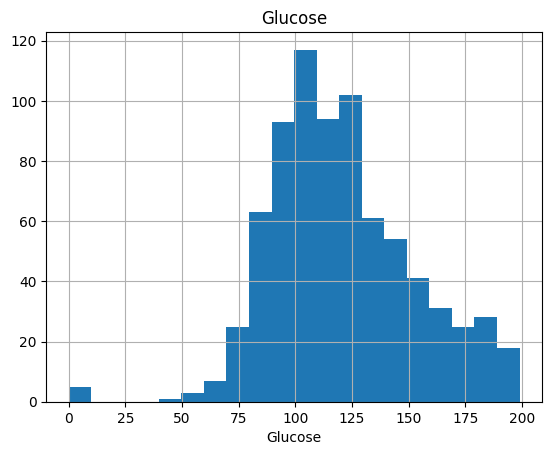

count   768.000
mean     69.105
std      19.356
min       0.000
1%        0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


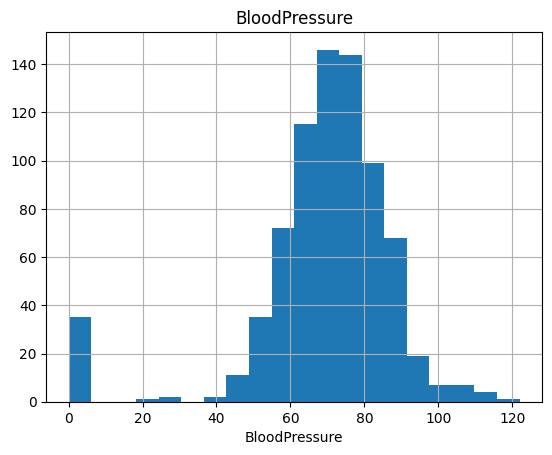

count   768.000
mean     20.536
std      15.952
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


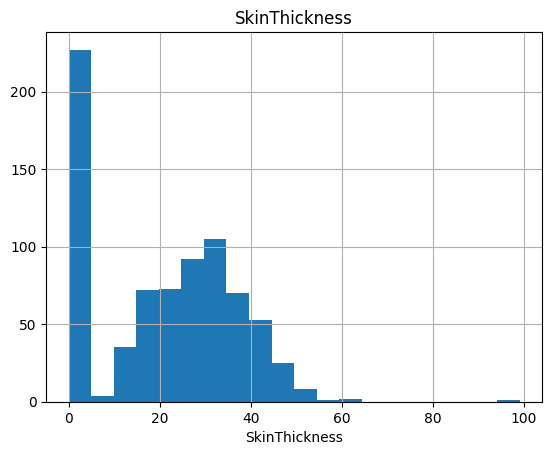

count   768.000
mean     79.799
std     115.244
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


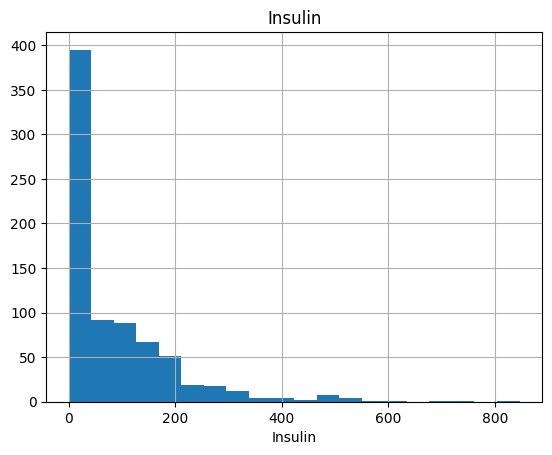

count   768.000
mean     31.993
std       7.884
min       0.000
1%        0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


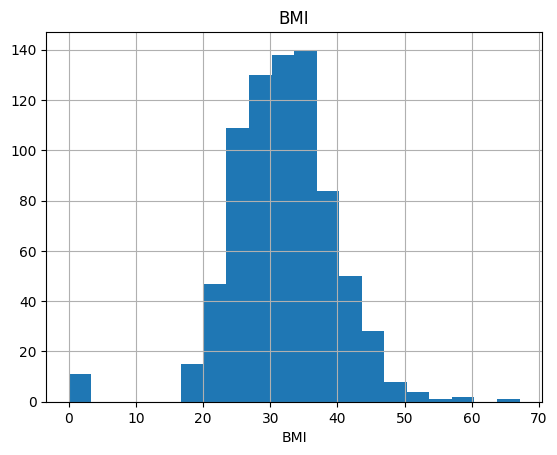

count   768.000
mean      0.472
std       0.331
min       0.078
1%        0.095
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


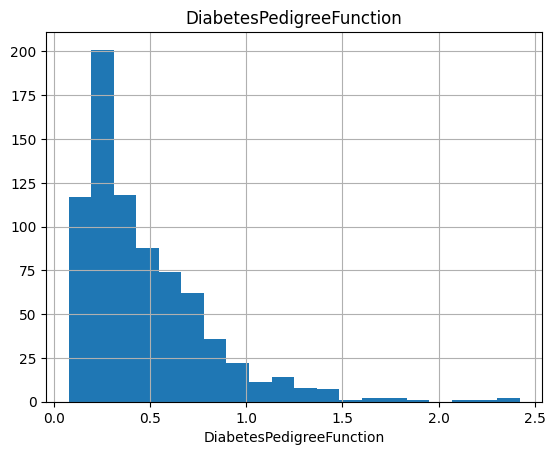

count   768.000
mean     33.241
std      11.760
min      21.000
1%       21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


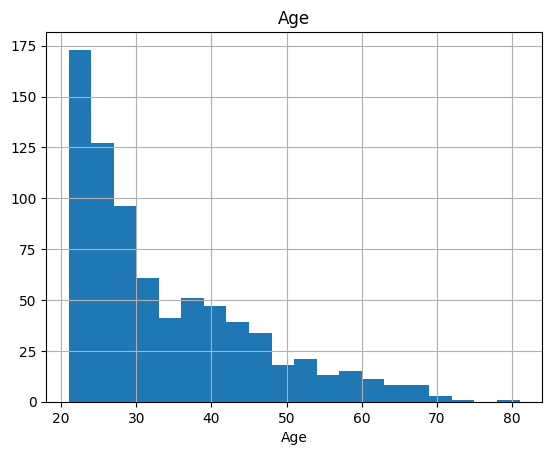

In [ ]:
num_summary_df(df)

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}))
  print("#############################################")

In [ ]:
def target_summary_with_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in num_cols:
    target_summary_with_num(dataframe, target, col)

In [ ]:
target_summary_with_num_df(df, "Outcome")

         Pregnancies
Outcome             
0              3.298
1              4.866
#############################################
         Glucose
Outcome         
0        109.980
1        141.257
#############################################
         BloodPressure
Outcome               
0               68.184
1               70.825
#############################################
         SkinThickness
Outcome               
0               19.664
1               22.164
#############################################
         Insulin
Outcome         
0         68.792
1        100.336
#############################################
           BMI
Outcome       
0       30.304
1       35.143
#############################################
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550
#############################################
           Age
Outcome       
0       31.190
1       37.067
##################

# Correlation Analysis

In [ ]:
def correlated_cols(dataframe):
  print(dataframe.corr())
  f, ax = plt.subplots(figsize=[10, 7])
  sns.heatmap(dataframe.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
  ax.set_title("Correlation Matrix", fontsize=20)
  plt.show()

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction    Age  Outcome
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074 0.018                    -0.034  0.544    0.222
Glucose                         0.129    1.000          0.153          0.057    0.331 0.221                     0.137  0.264    0.467
BloodPressure                   0.141    0.153          1.000          0.207    0.089 0.282                     0.041  0.240    0.065
SkinThickness                  -0.082    0.057          0.207          1.000    0.437 0.393                     0.184 -0.114    0.075
Insulin                        -0.074    0.331          0.089          0.437    1.000 0.198                     0.185 -0.042    0.131
BMI                             0.018    0.221          0.282          0.393    0.198 1.000                     0.141  0.036    0.293
DiabetesPedigreeFunction       -0.034    0.137          0.041 

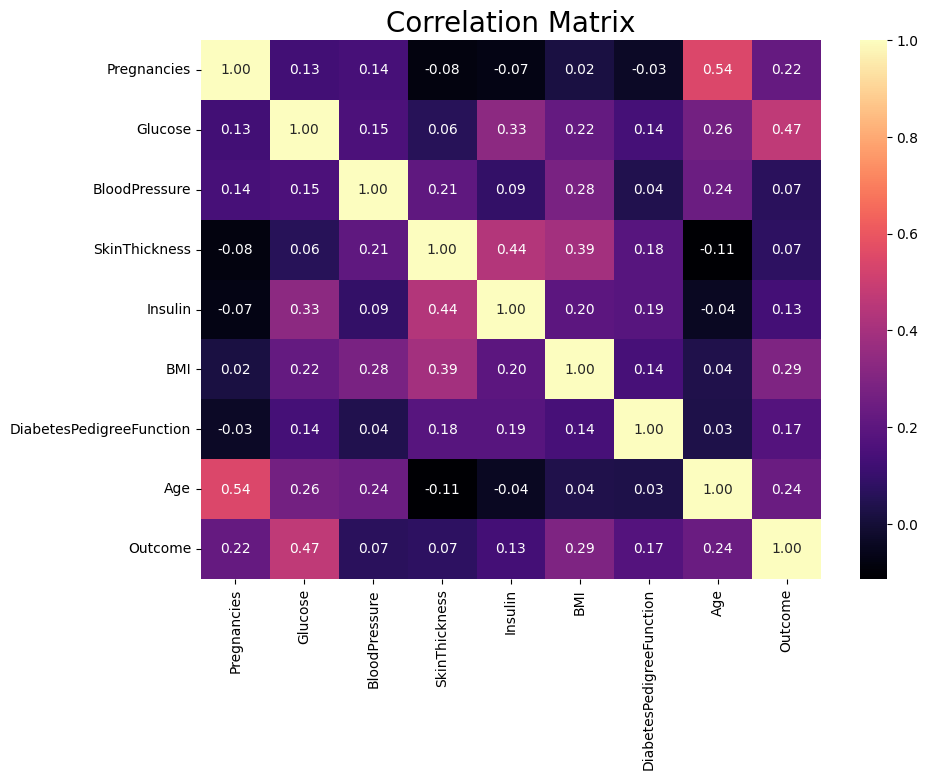

In [ ]:
correlated_cols(df)

In [ ]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(10,7)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

############## After Correlation Analysis, You Don't Need to Remove Variables ##############


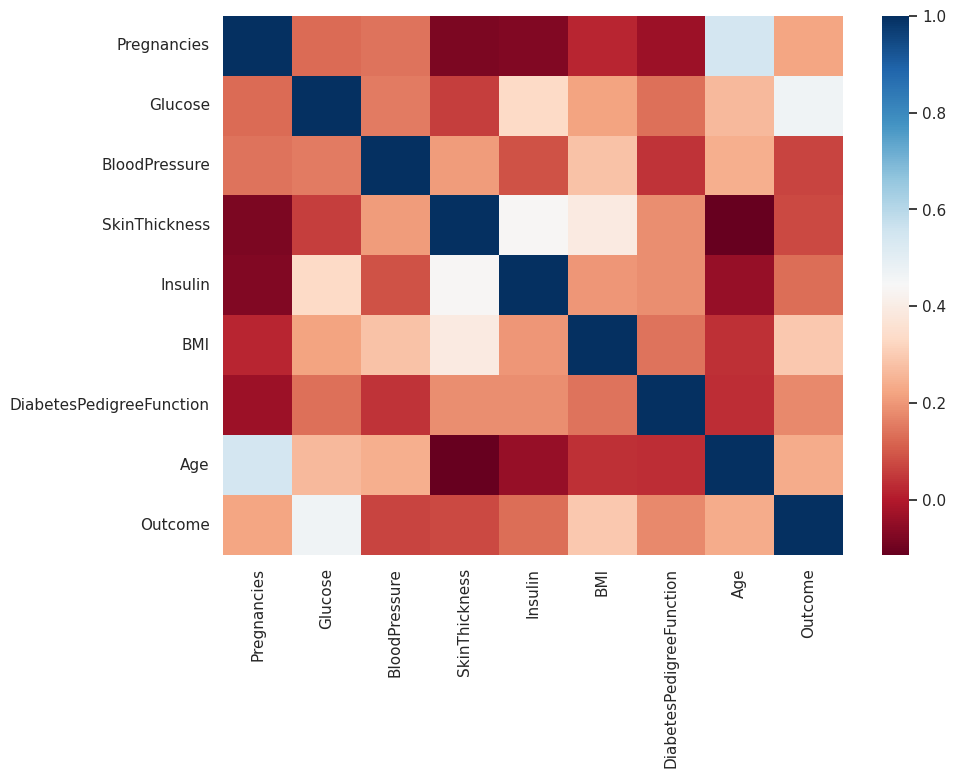

[]

In [ ]:
high_correlated_cols(df, plot=True)

# Create a Base Model

In [ ]:
def RF_Model(dataframe, target, test_size=0.30):
  y = dataframe[target]
  X = dataframe.drop(target, axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  rf_model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  print(15*"#", "Base Model Metrics Without any Feature Engineering", 15*"#")
  print(f"Acuuracy: {round(accuracy_score(y_pred, y_test), 2)}")
  print(f"Recall: {round(recall_score(y_pred, y_test), 2)}")
  print(f"Precision: {round(precision_score(y_pred, y_test), 2)}")
  print(f"ROC_AUC: {round(roc_auc_score(y_pred, y_test), 2)}")
  print(f"F1: {round(f1_score(y_pred, y_test), 2)}")

  return rf_model

In [ ]:
rf_model = RF_Model(df, "Outcome")

############### Base Model Metrics Without any Feature Engineering ###############
Acuuracy: 0.79
Recall: 0.77
Precision: 0.6
ROC_AUC: 0.78
F1: 0.68


In [ ]:
X = df.drop("Outcome", axis=1)
pd.DataFrame({'Value': rf_model.feature_importances_, 'Feature': X.columns})

,Value,Feature
0,0.084,Pregnancies
1,0.240,Glucose
2,0.098,BloodPressure
3,0.069,SkinThickness
4,0.070,Insulin
5,0.176,BMI
6,0.131,DiabetesPedigreeFunction
7,0.131,Age


In [ ]:
def plot_importance(model, features, num=len(X), save=False):
  feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
  plt.figure(figsize=(8,8))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
  plt.title("Features")
  plt.tight_layout()
  if save:
    plt.savefig("importance_features.jpg")

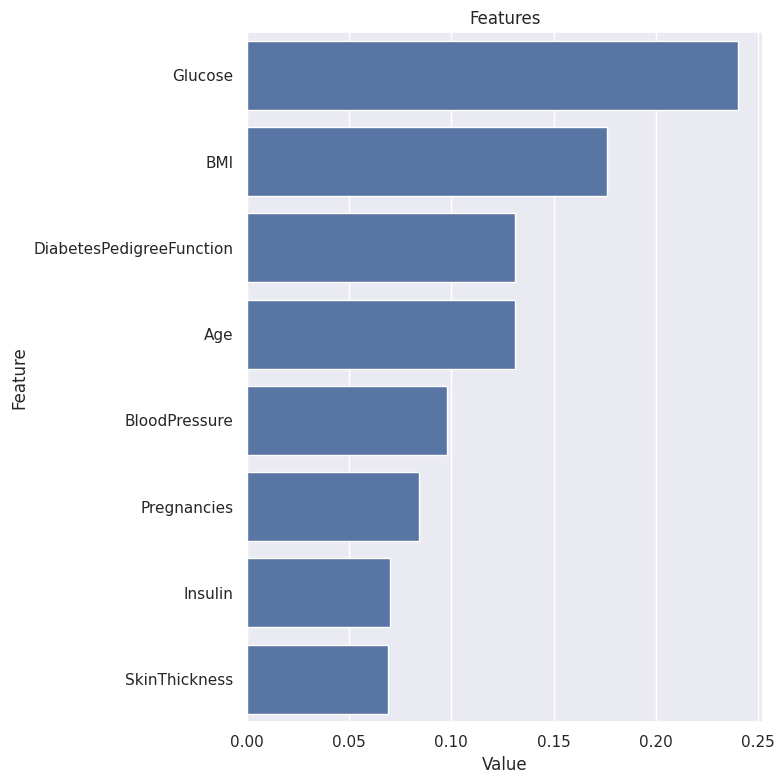

In [ ]:
plot_importance(rf_model, X, save=True)

In [ ]:
def RF_Model_FI(dataframe, target, test_size=0.30, save=False):
  y = dataframe[target]
  X = dataframe.drop(target, axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  rf_model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)

  print(15*"#", "Base Model Metrics Without any Feature Engineering", 15*"#")
  print(f"Acuuracy: {round(accuracy_score(y_pred, y_test), 2)}")
  print(f"Recall: {round(recall_score(y_pred, y_test), 2)}")
  print(f"Precision: {round(precision_score(y_pred, y_test), 2)}")
  print(f"ROC_AUC: {round(roc_auc_score(y_pred, y_test), 2)}")
  print(f"F1: {round(f1_score(y_pred, y_test), 2)}")

  feature_imp = pd.DataFrame({'Value': rf_model.feature_importances_, 'Feature': X.columns})
  plt.figure(figsize=(8,8))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
  plt.title("Features")
  plt.tight_layout()
  if save:
    plt.savefig("importance_features.jpg")


############### Base Model Metrics Without any Feature Engineering ###############
Acuuracy: 0.79
Recall: 0.77
Precision: 0.6
ROC_AUC: 0.78
F1: 0.68


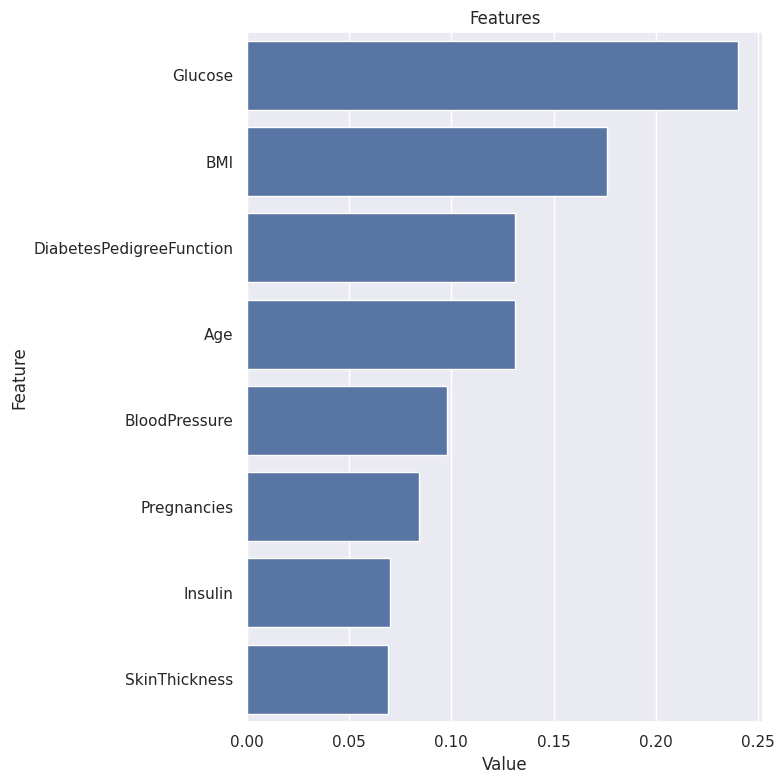

In [ ]:
RF_Model_FI(df, "Outcome")

# Feature Engineering

# Missing Value Analysis

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


In [ ]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
for col in zero_columns:
  df[col] = np.where(df[col] == 0, np.nan, df[col])

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [ ]:
def missing_value_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss","ratio"])
  print(missing_df, end="\n")
  if na_name:
    return na_columns

In [ ]:
na_columns = missing_value_table(df, na_name=True)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


In [ ]:
# Show Miising Value on Plot
def show_missing_value_plot(dataframe, bar=True, matrix=True, heatmap=True):
  if bar:
    msno.bar(dataframe);
  if matrix:
    msno.matrix(dataframe);
  if heatmap:
    msno.heatmap(dataframe);

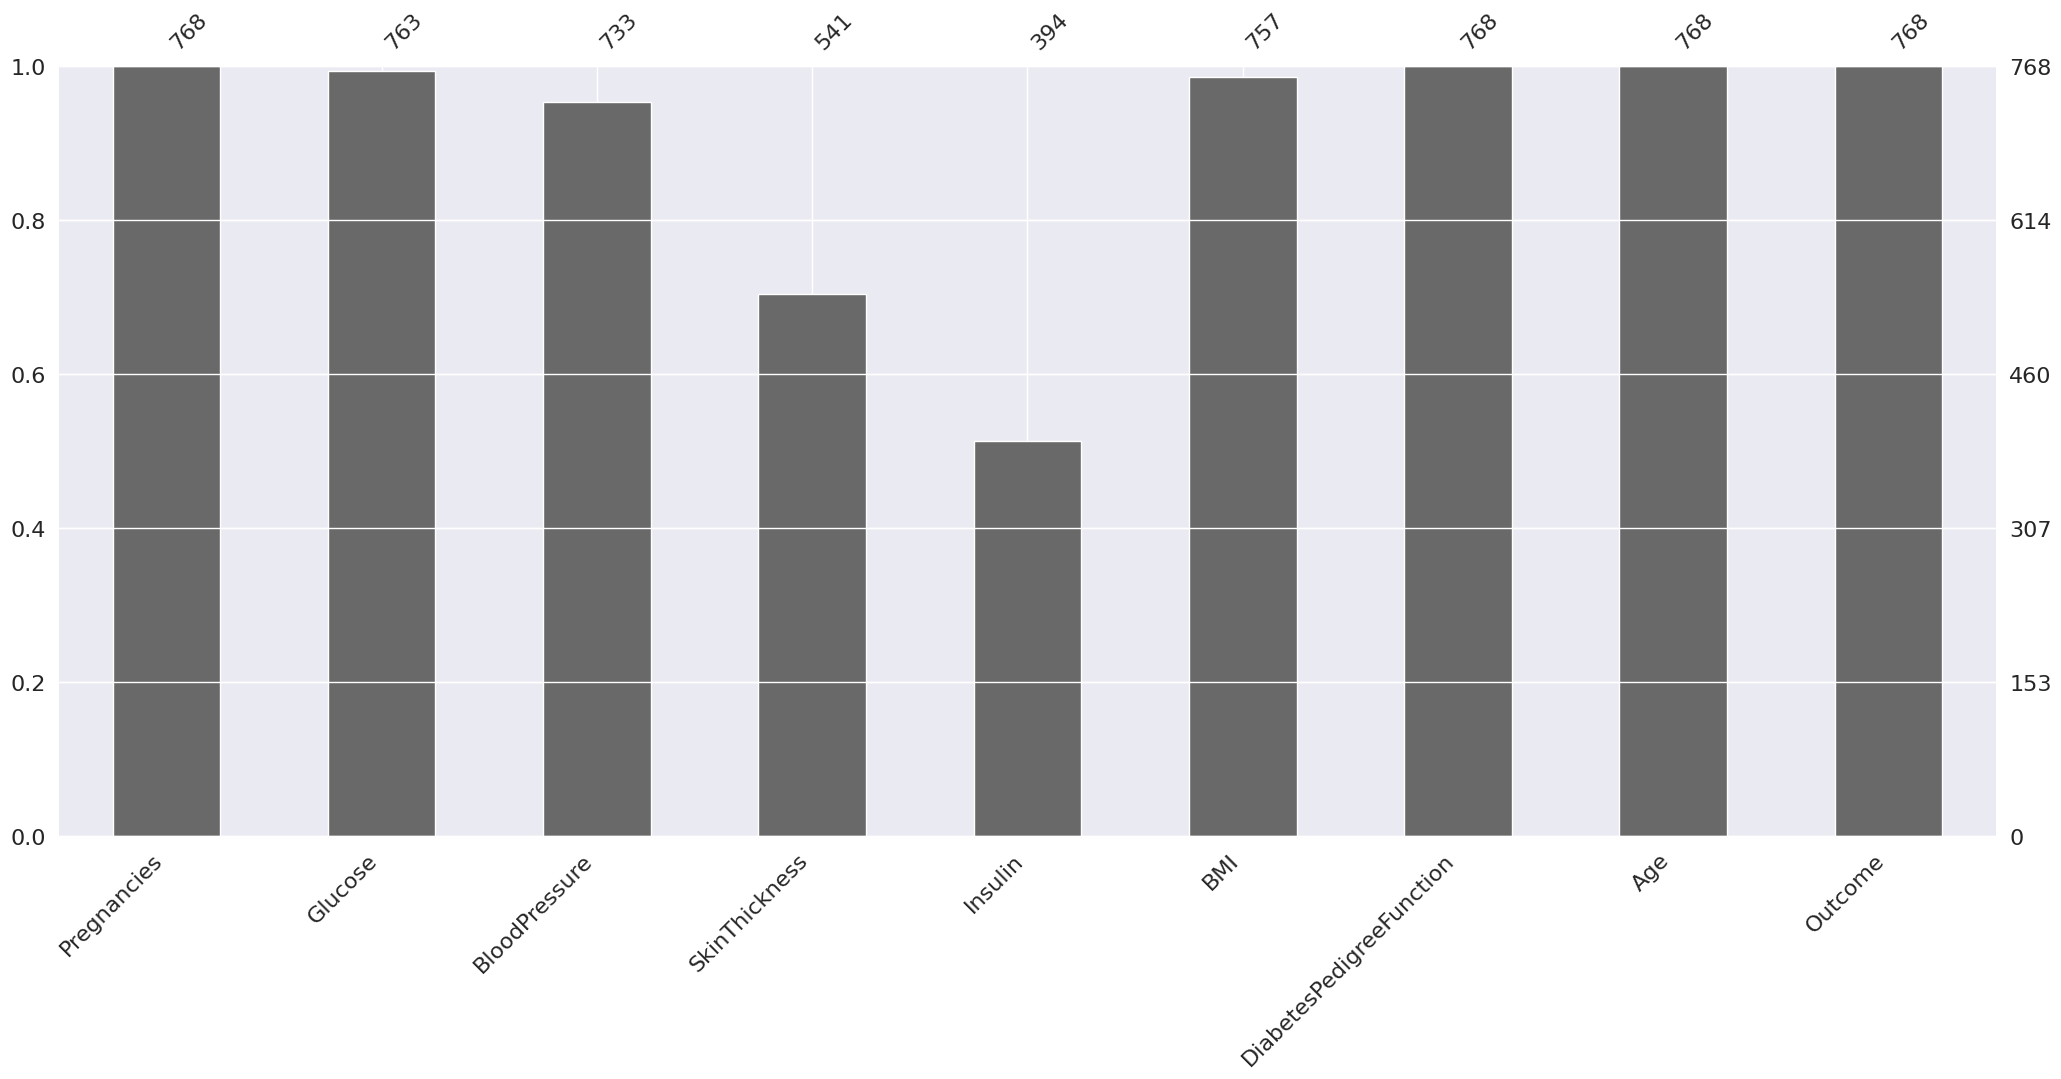

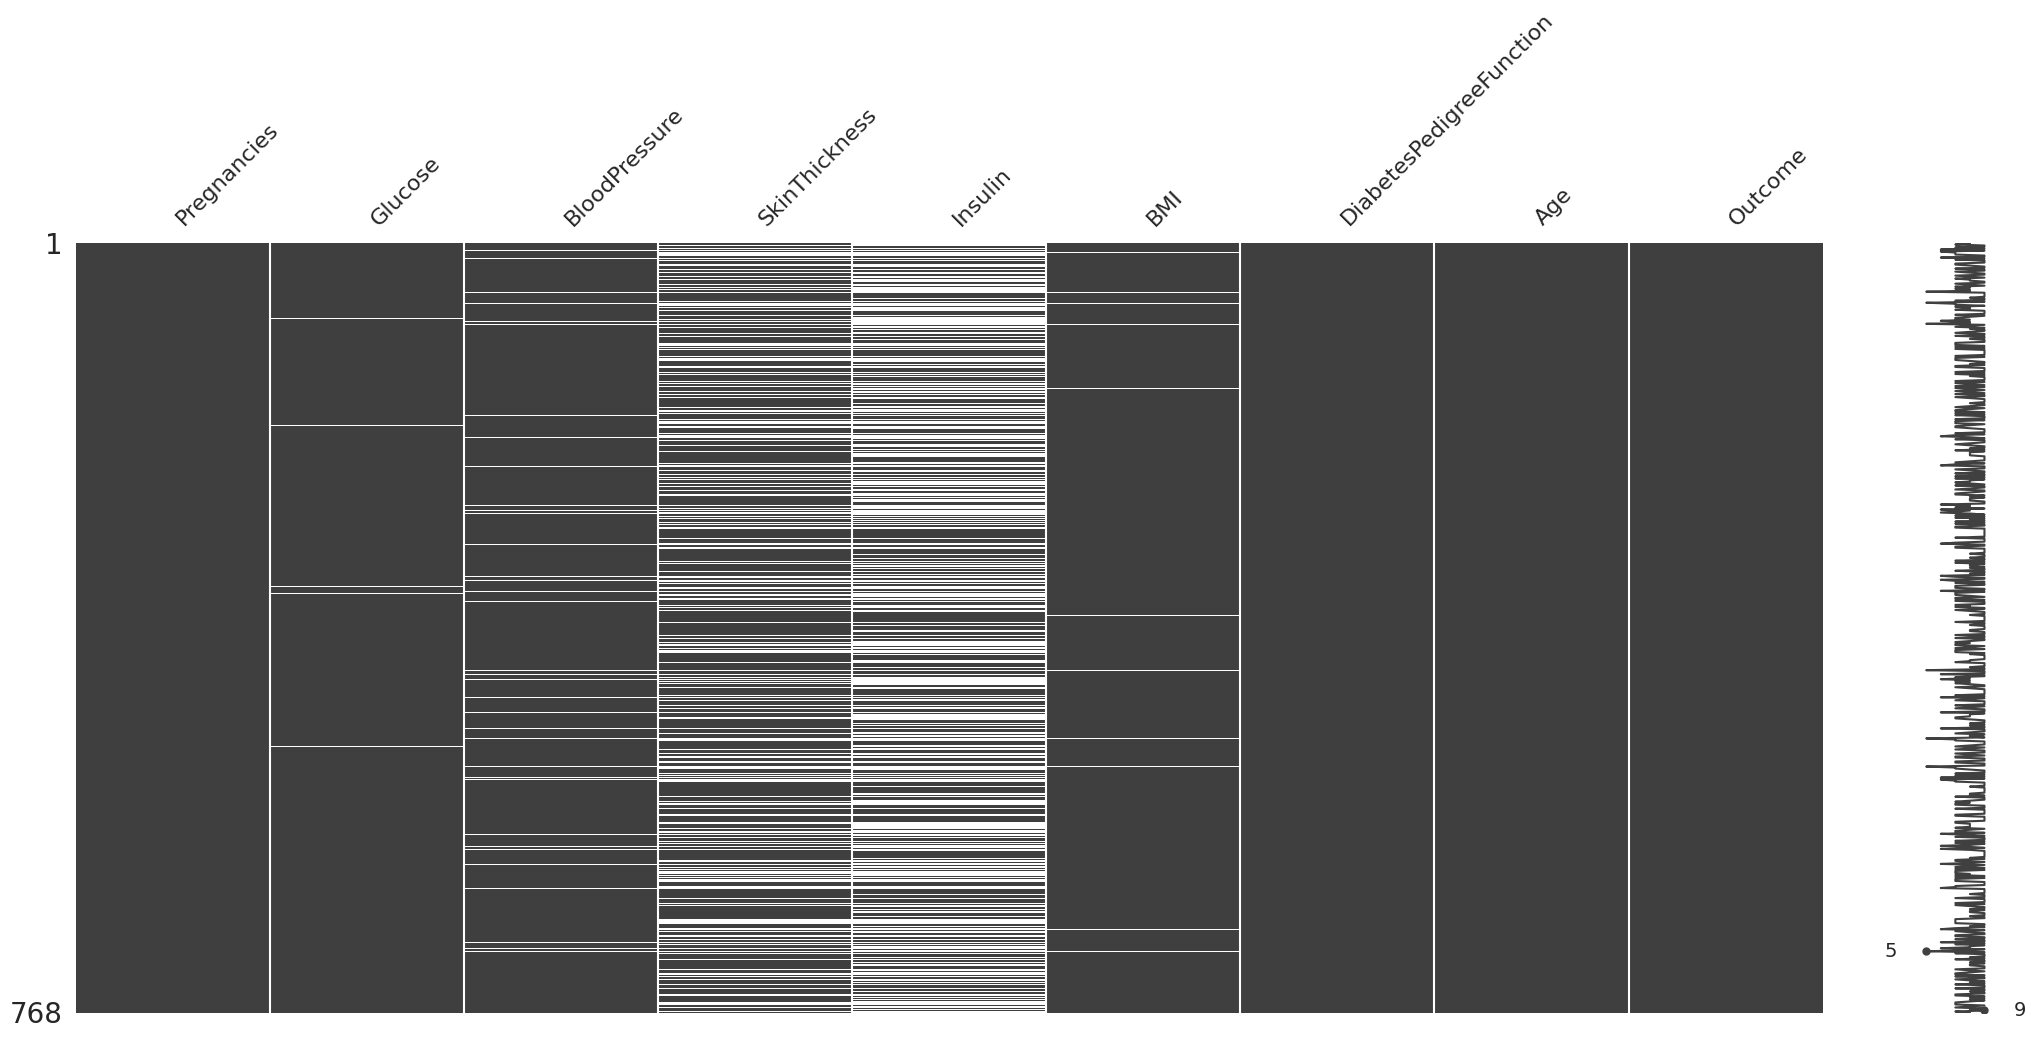

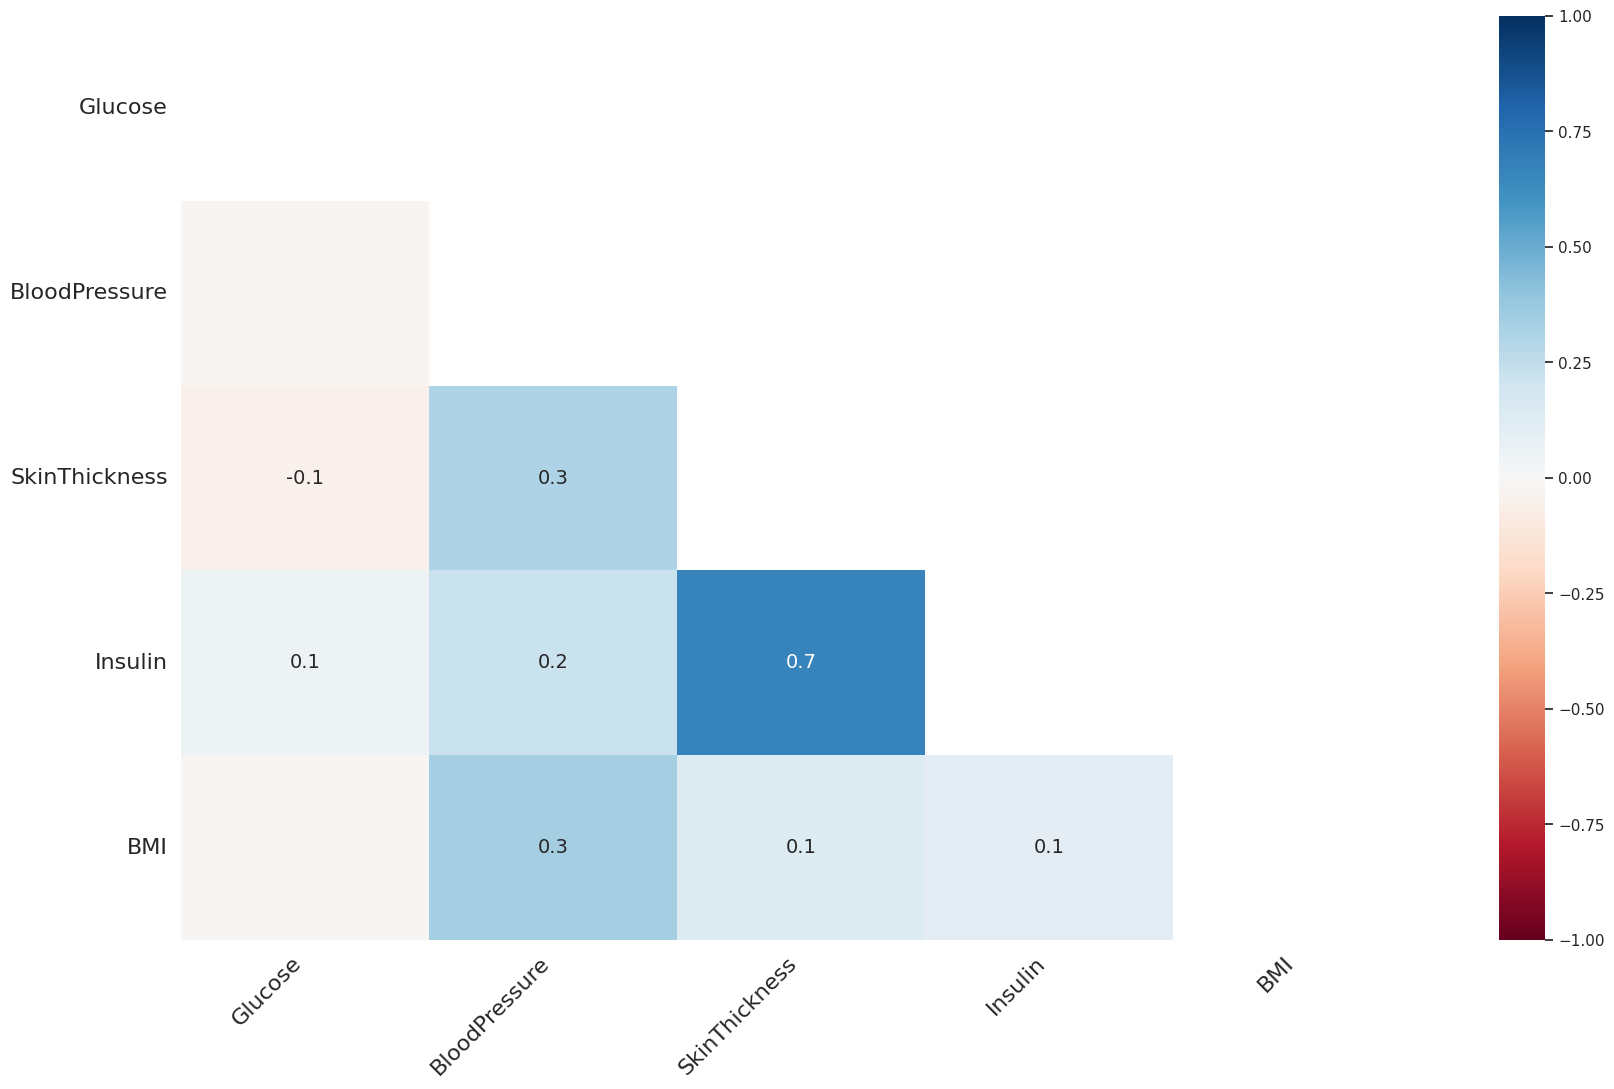

In [ ]:
show_missing_value_plot(df)

In [ ]:
# Examining the Relationship of Missing Values with the Dependent Variable
def missing_vs_target(dataframe, target):
  na_columns = missing_value_table(dataframe, na_name=True)
  temp_df = dataframe.copy()
  for col in na_columns:
    temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0)
  na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
  for col in na_flags:
    print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                        "Count": temp_df.groupby(col)[target].count()}))
    print("##################################################")

In [ ]:
missing_vs_target(df, "Outcome")

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650
                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    763
1                      0.400      5
##################################################
                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.344    733
1                            0.457     35
##################################################
                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.333    541
1                            0.388    227
##################################################
                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.330    394
1                      0.369    374
#################################################

In [ ]:
def fill_na_with_median(dataframe):
  dataframe = dataframe.apply(lambda x: x.fillna(x.median()) if x.dtype not in ["category", "object", "bool"] else x, axis=0)
  return dataframe

In [ ]:
df = fill_na_with_median(df)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Outlier Analysis

In [ ]:
def outlier_threshold(dataframe, col_name, q1=0.05, q3=0.95):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_threshold(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [ ]:
def check_outlier_df(dataframe):
  for col in dataframe.columns:
    print(col, " ==> ", check_outlier(dataframe, col))

In [ ]:
check_outlier_df(df)

Pregnancies  ==>  False
Glucose  ==>  False
BloodPressure  ==>  False
SkinThickness  ==>  True
Insulin  ==>  True
BMI  ==>  False
DiabetesPedigreeFunction  ==>  False
Age  ==>  False
Outcome  ==>  False


In [ ]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_threshold(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [ ]:
def replace_with_thresholds_dataframe(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    replace_with_thresholds(dataframe, col)

In [ ]:
def replace_with_thresholds_and_show_outliers(dataframe):
  for col in dataframe.columns:
    print(col, " ==> ", check_outlier(dataframe, col))
    if check_outlier(dataframe, col):
      replace_with_thresholds(dataframe, col)

In [ ]:
replace_with_thresholds_and_show_outliers(df)

Pregnancies  ==>  False
Glucose  ==>  False
BloodPressure  ==>  False
SkinThickness  ==>  True
Insulin  ==>  True
BMI  ==>  False
DiabetesPedigreeFunction  ==>  False
Age  ==>  False
Outcome  ==>  False


In [ ]:
check_outlier_df(df)

Pregnancies  ==>  False
Glucose  ==>  False
BloodPressure  ==>  False
SkinThickness  ==>  False
Insulin  ==>  False
BMI  ==>  False
DiabetesPedigreeFunction  ==>  False
Age  ==>  False
Outcome  ==>  False


# Feature Extraction

In [ ]:
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightseniro"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthyseniro"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] >= 30) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] >= 30) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"
df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_Glucose_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_Glucose_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_Glucose_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_Glucose_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] < 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_Glucose_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] < 125)) & (df["Age"] >= 50), "NEW_AGE_Glucose_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] >= 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_Glucose_NOM"] = "highmature"
df.loc[(df["Glucose"] >= 125) & (df["Age"] >= 50), "NEW_AGE_Glucose_NOM"] = "highsenior"

In [ ]:
df.loc[(df["Insulin"] >= 16) & (df["Insulin"] <= 166), "NEW_INSULIN_SCORE"] = "Normal"
df.loc[(df["Insulin"] < 16) | (df["Insulin"] > 166), "NEW_INSULIN_SCORE"] = "Abnormal"

In [ ]:
df["Glucose_*_Insulin"] = df["Glucose"] * df["Insulin"]
df["Glucose_*_Pregnancies"] = df["Glucose"] * df["Pregnancies"]
df["Pregnancies_*_BMI"] = df["Pregnancies"] * df["BMI"]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_AGE_BMI_NOM,NEW_AGE_Glucose_NOM,NEW_INSULIN_SCORE,Glucose_*_Insulin,Glucose_*_Pregnancies,Pregnancies_*_BMI
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,senior,obesesenior,highsenior,Normal,18500.000,888.000,201.600
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,mature,overweightmature,normalmature,Normal,10625.000,85.000,26.600
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,mature,healthymature,highmature,Normal,22875.000,1464.000,186.400
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,overweightmature,normalmature,Normal,8366.000,89.000,28.100
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,obesemature,highmature,Abnormal,23016.000,0.000,0.000


In [ ]:
def upper_columns(dataframe):
  dataframe.columns = [col.upper() for col in dataframe.columns]
  return dataframe

In [ ]:
df = upper_columns(df)

In [ ]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,GLUCOSE_*_INSULIN,GLUCOSE_*_PREGNANCIES,PREGNANCIES_*_BMI
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,senior,obesesenior,highsenior,Normal,18500.000,888.000,201.600
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,mature,overweightmature,normalmature,Normal,10625.000,85.000,26.600
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,mature,healthymature,highmature,Normal,22875.000,1464.000,186.400
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,overweightmature,normalmature,Normal,8366.000,89.000,28.100
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,obesemature,highmature,Abnormal,23016.000,0.000,0.000


# Encoding

In [ ]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [ ]:
def label_encoder_dataframe(dataframe):
  binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in ["int", "float"] and dataframe[col].nunique() == 2]
  for col in binary_cols:
    label_encoder(dataframe, col)

In [ ]:
label_encoder_dataframe(df)

In [ ]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,GLUCOSE_*_INSULIN,GLUCOSE_*_PREGNANCIES,PREGNANCIES_*_BMI
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,1,obesesenior,highsenior,1,18500.000,888.000,201.600
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,0,overweightmature,normalmature,1,10625.000,85.000,26.600
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,0,healthymature,highmature,1,22875.000,1464.000,186.400
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,overweightmature,normalmature,1,8366.000,89.000,28.100
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0,obesemature,highmature,0,23016.000,0.000,0.000


In [ ]:
def one_hot_encoding(dataframe, drop_first=True):
  label_encoder_dataframe(dataframe)
  cat_cols = [col for col in dataframe.columns if 10 >= dataframe[col].nunique() > 2]
  dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
  return dataframe

In [ ]:
df = one_hot_encoding(df)

In [ ]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_INSULIN_SCORE,GLUCOSE_*_INSULIN,GLUCOSE_*_PREGNANCIES,PREGNANCIES_*_BMI,NEW_AGE_BMI_NOM_healthyseniro,NEW_AGE_BMI_NOM_obesemature,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_overweightmature,NEW_AGE_BMI_NOM_overweightsenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,1,1,18500.000,888.000,201.600,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,0,1,10625.000,85.000,26.600,0,0,0,1,0,0,0,0,0,0,0,1,0
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,0,1,22875.000,1464.000,186.400,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,1,8366.000,89.000,28.100,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0,0,23016.000,0.000,0.000,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.shape

(768, 27)

# Create a Machine Learning Model Using All Feature Engineering Methods

In [ ]:
def RF_Model_FI(dataframe, target, test_size=0.30, save=False):
  y = dataframe[target]
  X = dataframe.drop(target, axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)
  rf_model = RandomForestClassifier(random_state=17).fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)

  print(15*"#", "Model Metrics Using Feature Engineering", 15*"#")
  print(f"Acuuracy: {round(accuracy_score(y_pred, y_test), 2)}")
  print(f"Recall: {round(recall_score(y_pred, y_test), 2)}")
  print(f"Precision: {round(precision_score(y_pred, y_test), 2)}")
  print(f"ROC_AUC: {round(roc_auc_score(y_pred, y_test), 2)}")
  print(f"F1: {round(f1_score(y_pred, y_test), 2)}")

  feature_imp = pd.DataFrame({'Value': rf_model.feature_importances_, 'Feature': X.columns})
  plt.figure(figsize=(8,8))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
  plt.title("Features")
  plt.tight_layout()
  if save:
    plt.savefig("importance_features.jpg")


Random Forest Model Metrics Without any Feature Engineering:

Acuuracy: 0.79

Recall: 0.77

Precision: 0.6

ROC_AUC: 0.78

F1: 0.68

############### Model Metrics Using Feature Engineering ###############
Acuuracy: 0.8
Recall: 0.74
Precision: 0.64
ROC_AUC: 0.78
F1: 0.69


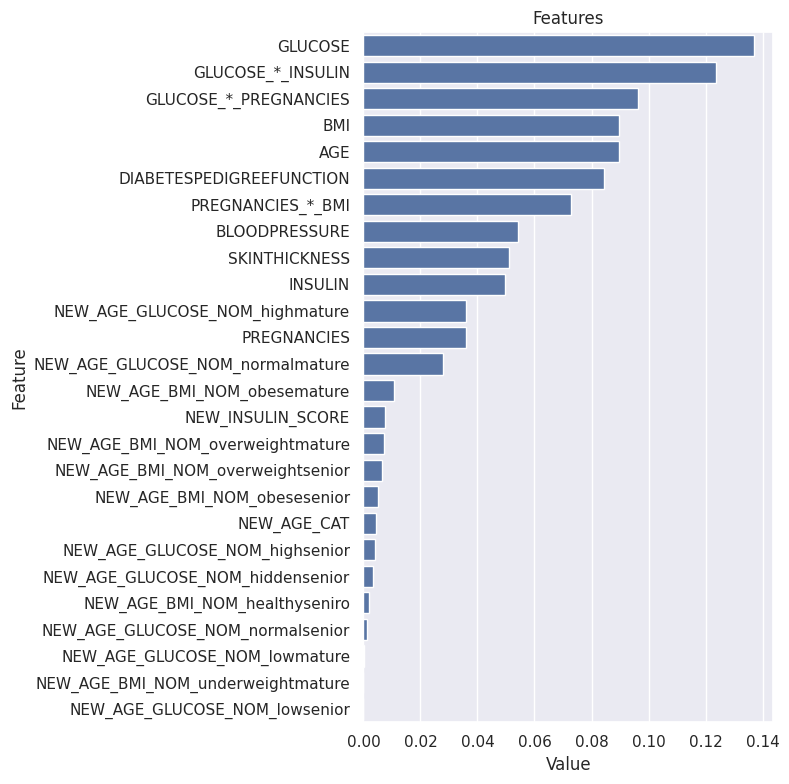

In [ ]:
RF_Model_FI(df, "OUTCOME")